<a href="https://www.kaggle.com/code/mosesmoncy/stroke-prediction-using-random-forest?scriptVersionId=126866473" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [2]:
a=pd.read_csv('/kaggle/input/strock-prediction-dataset/healthcare-dataset-stroke-data.csv')
a

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
# dropping 'id'
a=a.drop(['id'],axis=1)
a

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
a.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
a.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [6]:
a.shape

(5110, 11)

In [7]:
a.describe

<bound method NDFrame.describe of       gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_ty

In [8]:
a.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
a['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [10]:
a['bmi']=a['bmi'].fillna(a['bmi'].mean())

In [11]:
a.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
a.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

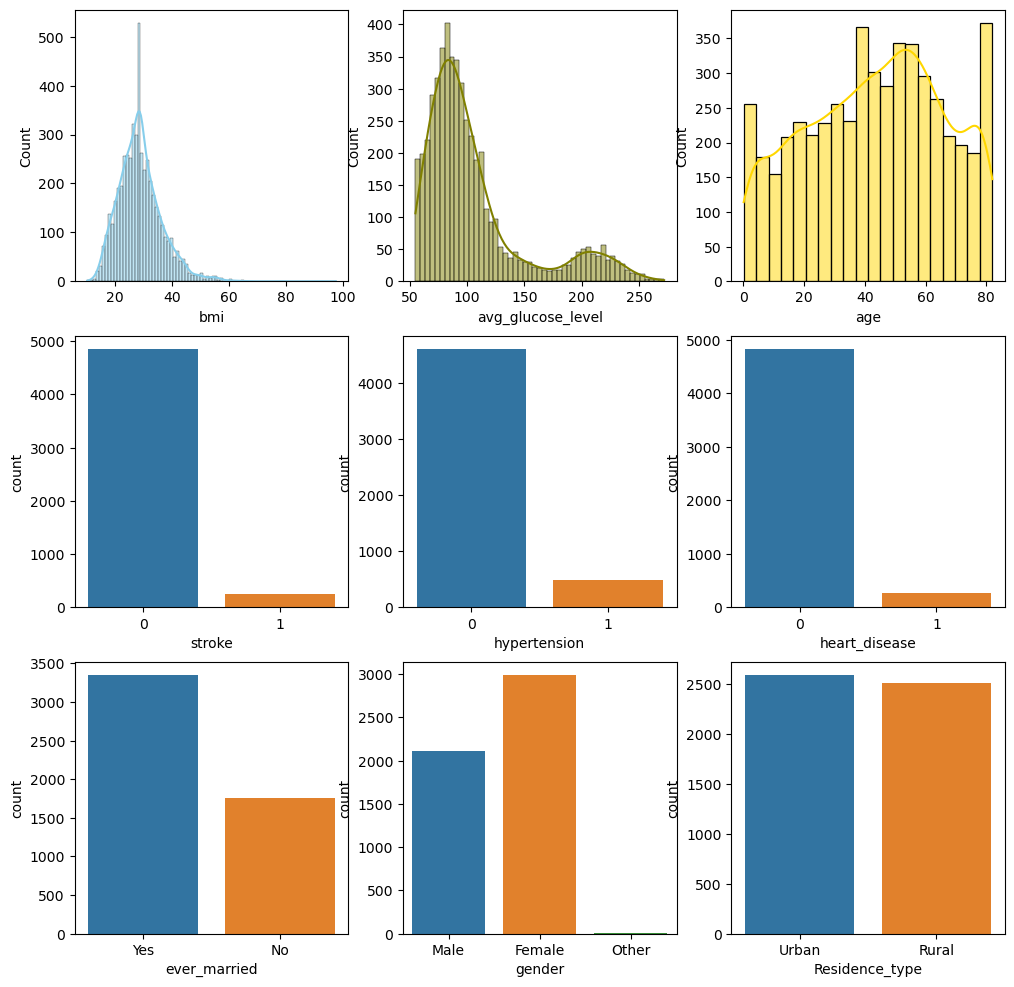

In [13]:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
sns.histplot(data=a["bmi"], kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=a["avg_glucose_level"], kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=a["age"], kde=True, color="gold", ax=axs[0, 2])
sns.countplot(x = a["stroke"], ax=axs[1, 0])

sns.countplot(x = a["hypertension"], ax=axs[1, 1])
sns.countplot(x = a["heart_disease"], ax=axs[1, 2])
sns.countplot(x = a["ever_married"], ax=axs[2, 0])
sns.countplot(x = a["gender"], ax=axs[2, 1])
sns.countplot(x = a["Residence_type"], ax=axs[2, 2])

Encoding

In [14]:
# converting object into numerical values

# applying 'Label Encoding'

from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()

cols=['gender','ever_married','work_type','Residence_type','smoking_status']
a[cols]=a[cols].apply(la.fit_transform)



In [15]:
a

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [16]:
a.dtypes

gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

In [17]:
# splitting dataset   x(inputs) & y(output)

x=a.iloc[:,:-1]
y=a.iloc[:,-1]
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [18]:
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1


In [19]:
# implementing train test split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3897,1,4.00,0,0,0,4,0,90.42,16.2,0
576,1,29.00,0,0,0,2,1,207.58,22.8,3
4013,1,44.00,1,0,1,2,0,91.28,26.5,2
4536,0,68.00,1,0,1,2,1,150.74,40.3,0
1180,0,62.00,0,0,1,2,0,82.57,36.0,1
...,...,...,...,...,...,...,...,...,...,...
4426,1,43.00,0,0,1,0,0,88.00,30.6,2
466,0,61.00,1,0,1,2,0,170.05,60.2,3
3092,0,1.16,0,0,0,4,1,97.28,17.8,0
3772,1,80.00,0,0,1,3,0,196.08,31.0,1


In [20]:
y_train

3897    0
576     0
4013    0
4536    0
1180    0
       ..
4426    0
466     0
3092    0
3772    0
860     0
Name: stroke, Length: 3577, dtype: int64

Preprocessing

In [21]:
# appling StandardScalar

from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(x_train)

x_train=scalar.fit_transform(x_train)
x_test=scalar.fit_transform(x_test)

In [22]:
# model creation using RandomForestClassifier

model=RandomForestClassifier()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

PERFORMANCE EVALUATION

In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print('confusion matrix is',confusion_matrix(y_test,y_pred))
print('accuracy score is',accuracy_score(y_test,y_pred)*100)
print('classification report is',classification_report(y_test,y_pred))

confusion matrix is [[1443    1]
 [  89    0]]
accuracy score is 94.12915851272015
classification report is               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.48      1533
weighted avg       0.89      0.94      0.91      1533



EDA(Exploratory data analysis)

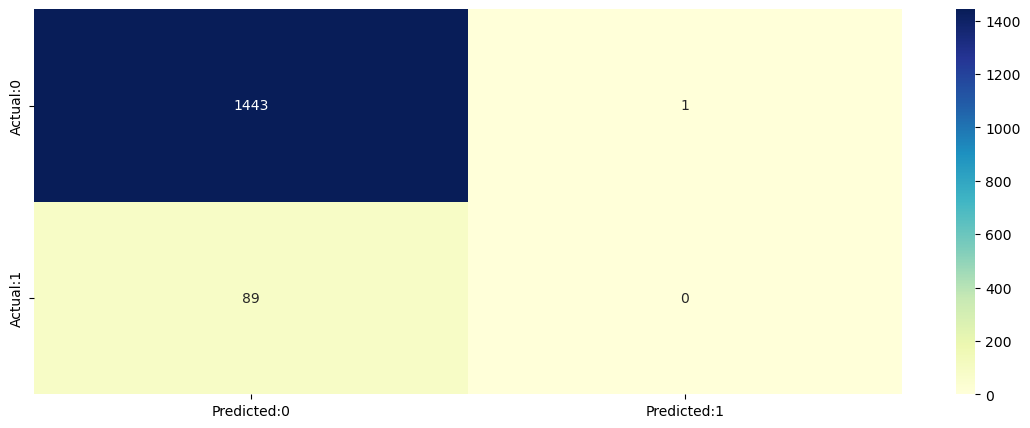

In [24]:
plt.figure(figsize=(14,5))
cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

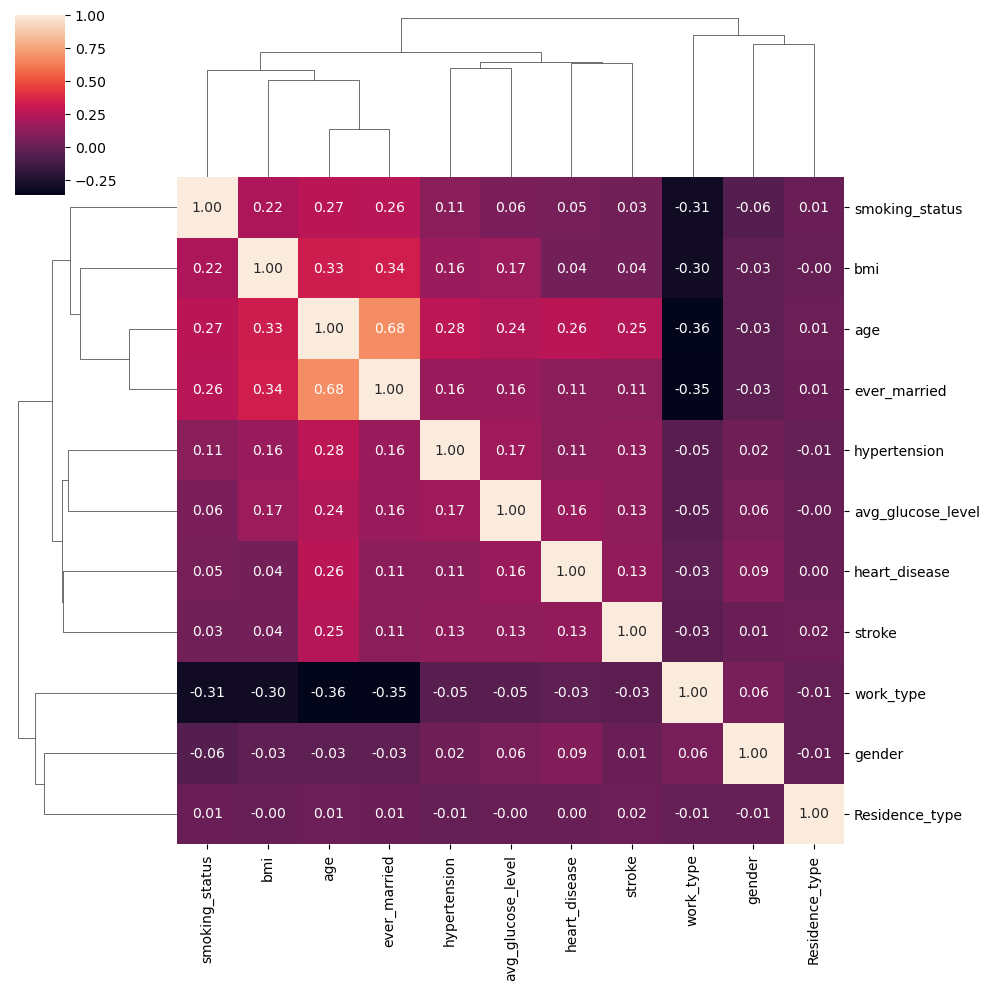

In [25]:
corr_matrix=a.corr()
sns.clustermap(corr_matrix,annot=True,fmt =".2f")
plt.show()

#Correlation of properties.

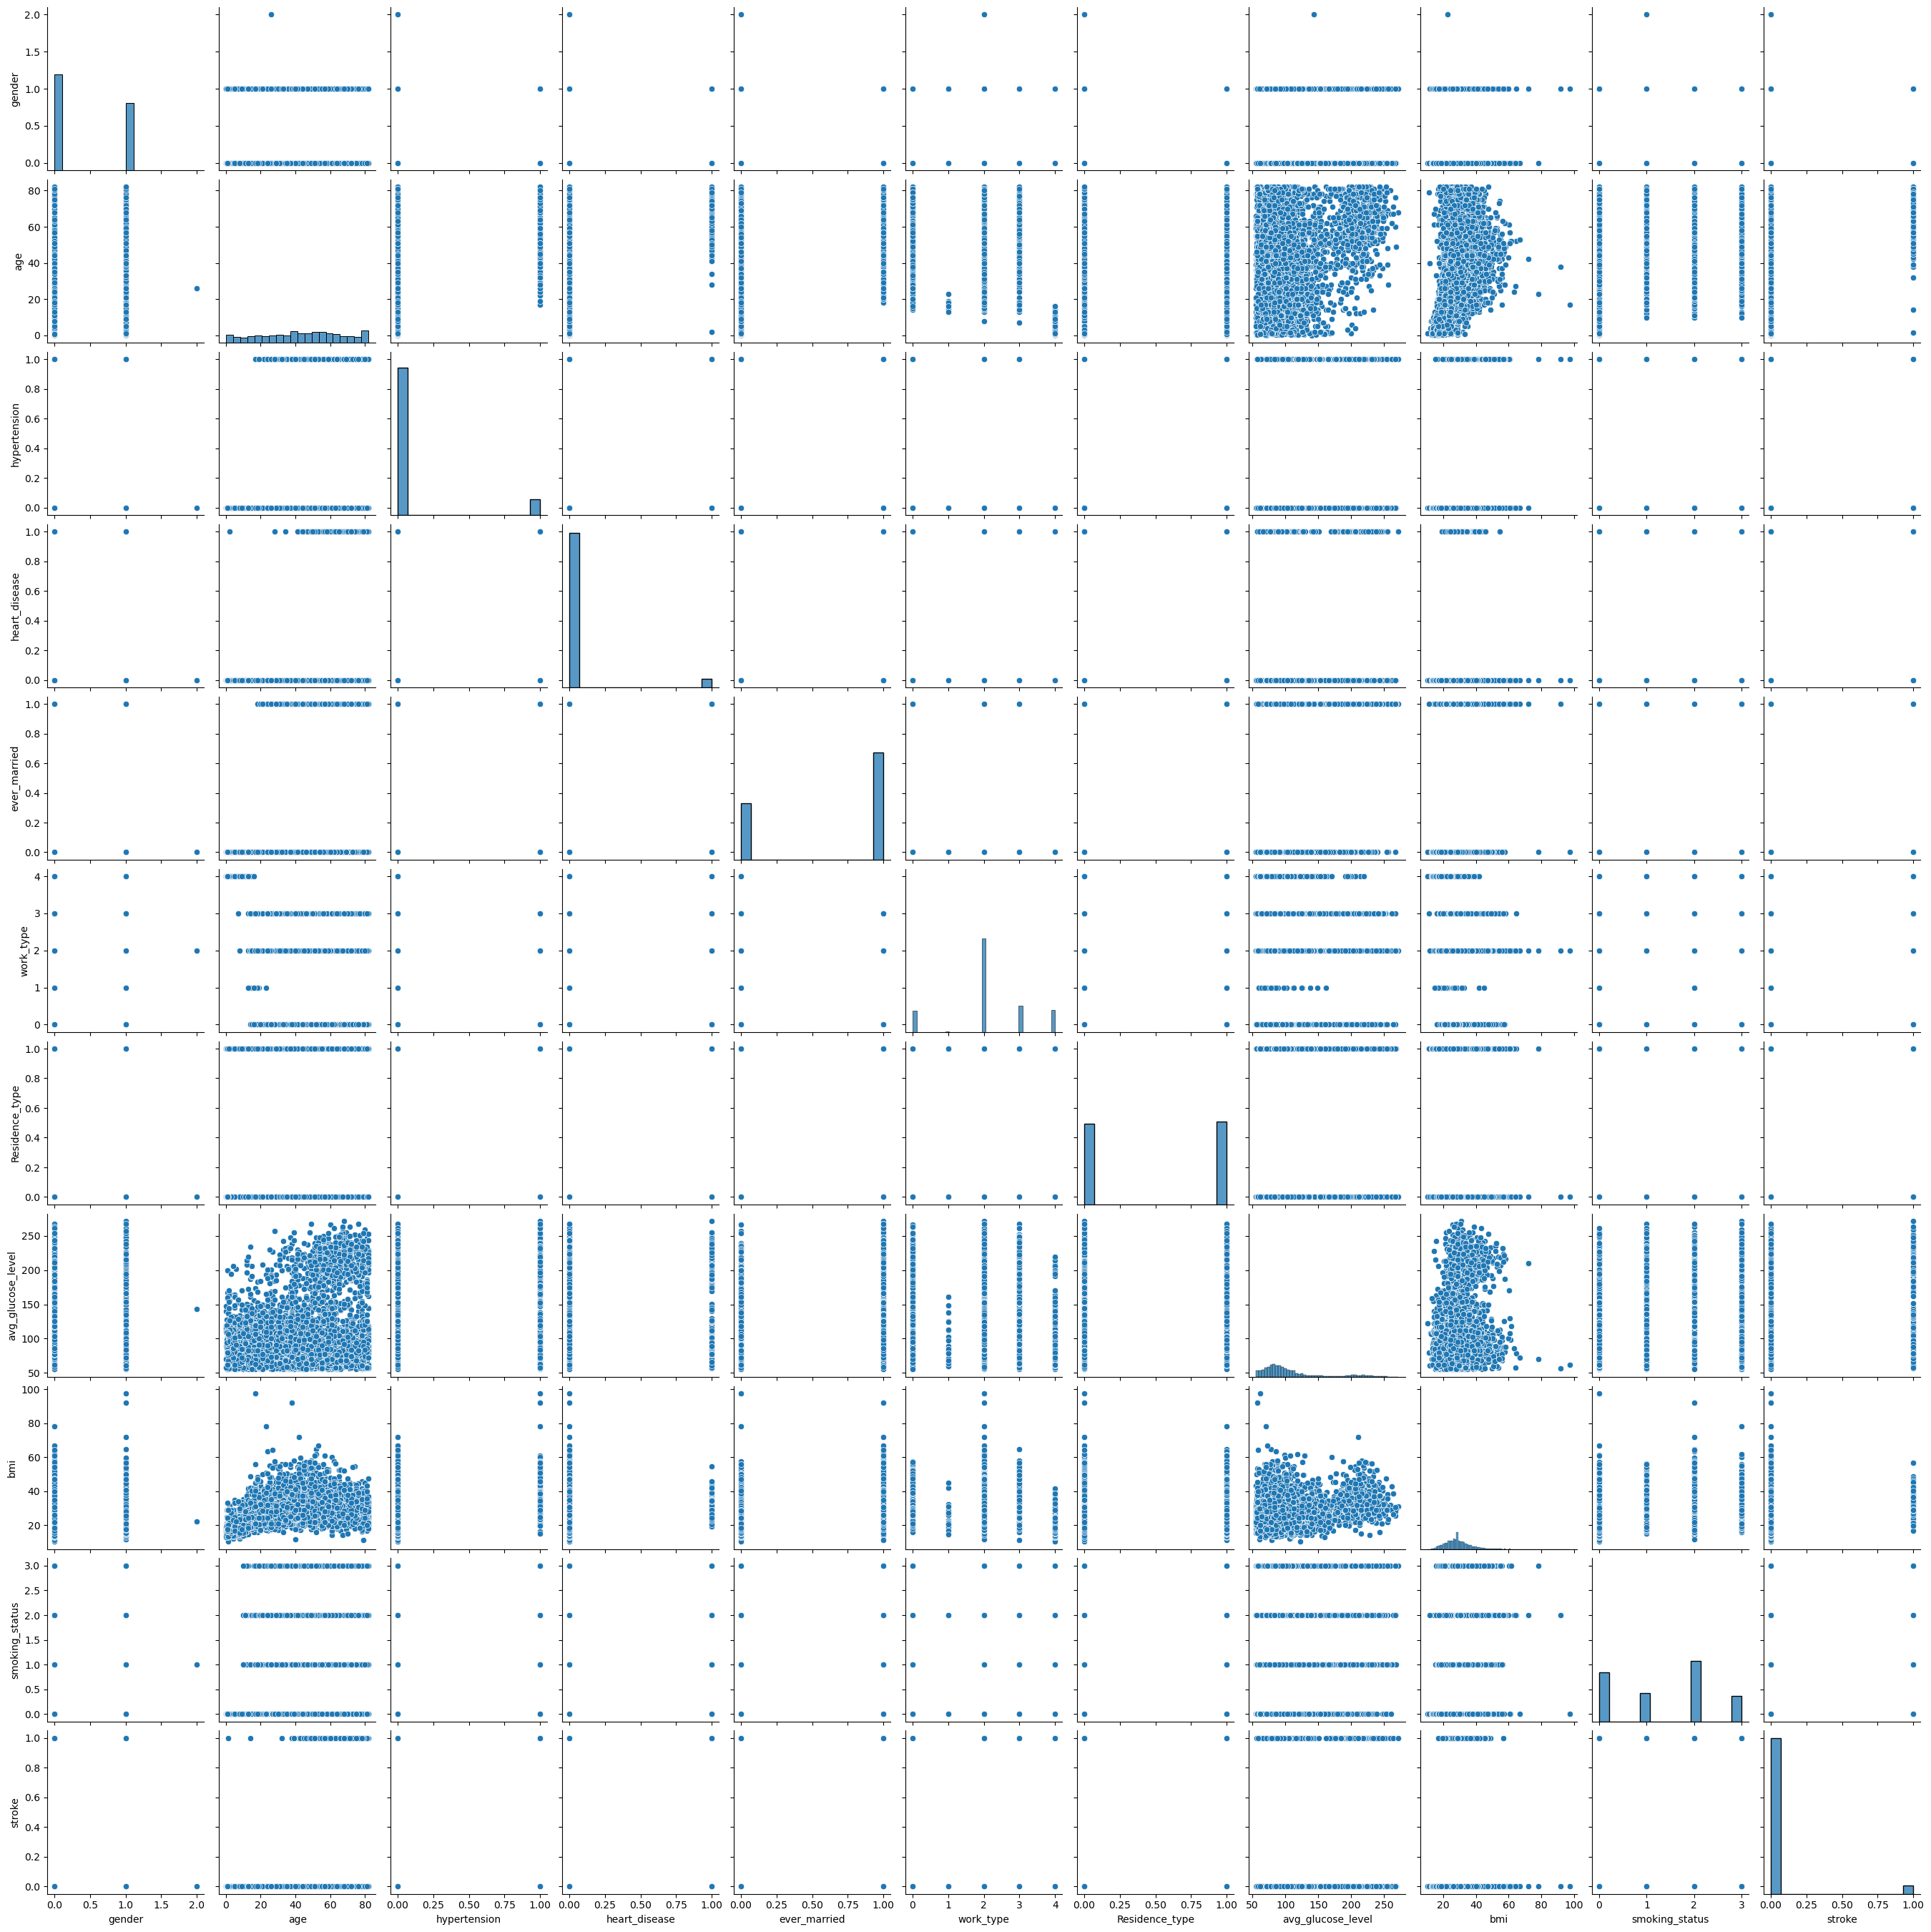

In [26]:
sns.pairplot(a)

<AxesSubplot:xlabel='stroke', ylabel='ever_married'>

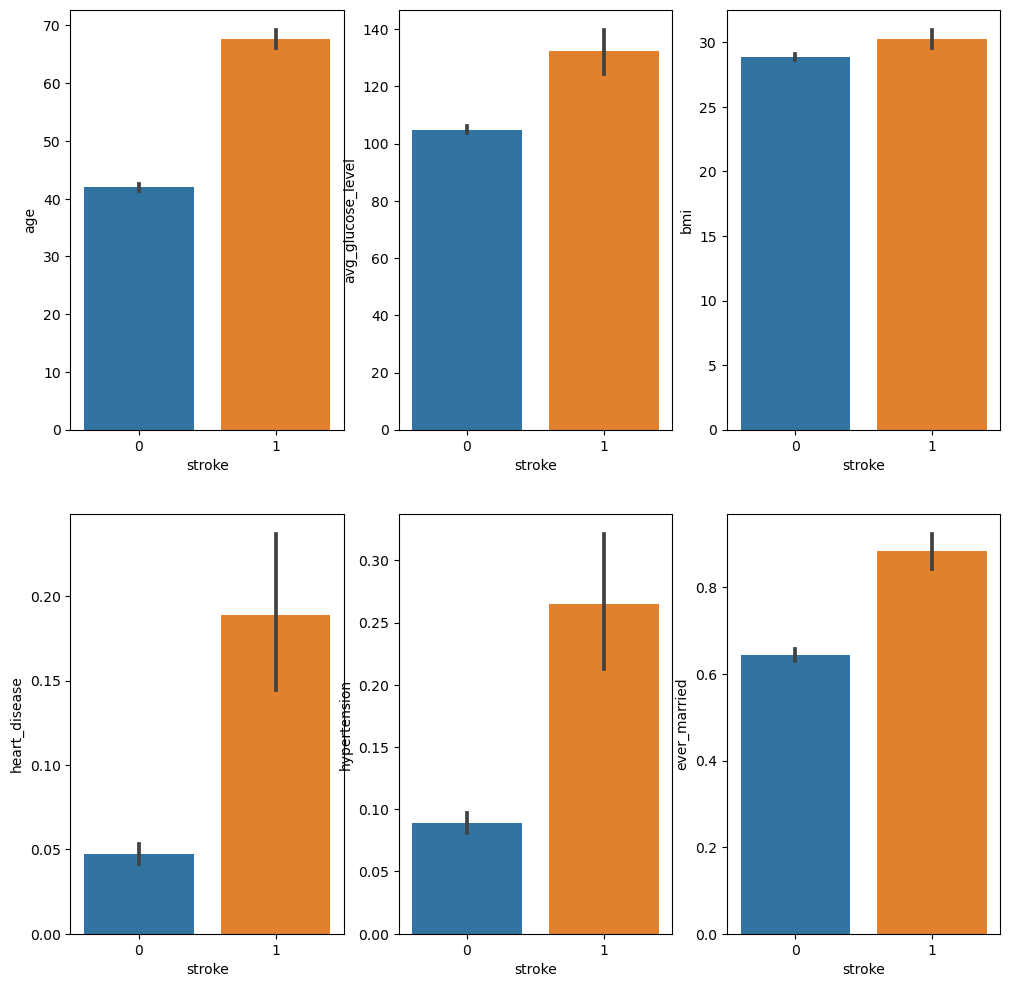

In [27]:
fig, axs = plt.subplots(2, 3, figsize=(12, 12))

sns.barplot(x=a["stroke"], y=a["age"], ax=axs[0, 0])
sns.barplot(x=a["stroke"], y=a["avg_glucose_level"], ax=axs[0, 1])
sns.barplot(x=a["stroke"], y=a["bmi"], ax=axs[0, 2])
sns.barplot(x=a["stroke"], y=a["heart_disease"], ax=axs[1, 0])

sns.barplot(x=a["stroke"], y=a["hypertension"], ax=axs[1, 1])
sns.barplot(x=a["stroke"], y=a["ever_married"], ax=axs[1, 2])